In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm

In [24]:
path = 'C:/Users/PURUSHOTHAM/Downloads/crop-and-weed-detection-data-with-bounding-boxes/agri_data/data/'

In [25]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [26]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]

In [27]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

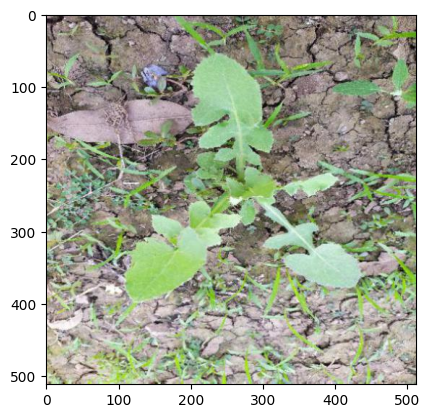

In [28]:
#checking our conversion is working or not
plt.imshow(cv2.cvtColor(cv2.imread(images[9]),cv2.COLOR_BGR2RGB))

In [29]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for id in tqdm(images):
    label = open(id[:-5]+'.txt','r') 
    a = label.read()
    label.close()
    label = a.split('\n')
    cleaned_label = label[:-1]
    
    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i,'image_name'] = id[78:]
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1
    

100%|██████████| 1300/1300 [00:04<00:00, 323.93it/s]


In [30]:
df.head()

,image_name,object,x_cen,y_cen,w,h
0,s/agri_data/data/agri_0_1009.jpeg,1,0.608398,0.498047,0.541016,0.53125
1,s/agri_data/data/agri_0_1017.jpeg,1,0.496094,0.384766,0.960938,0.753906
2,s/agri_data/data/agri_0_1018.jpeg,1,0.445312,0.483398,0.808594,0.634766
3,s/agri_data/data/agri_0_1020.jpeg,1,0.494141,0.350586,0.730469,0.611328
4,s/agri_data/data/agri_0_1024.jpeg,1,0.601562,0.448242,0.570312,0.595703


In [31]:
#column name for pascal-voc dataframe
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

In [32]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):
    
    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512  
    if df.loc[i,'object'] == 0:    
        pascal_voc.loc[i,'class'] = 'crop'
    else:
        pascal_voc.loc[i,'class'] = 'weed'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512) 
    

100%|██████████| 2072/2072 [00:03<00:00, 563.19it/s]


In [33]:
pascal_voc

,filename,width,height,class,xmin,ymin,xmax,ymax
0,s/agri_data/data/agri_0_1009.jpeg,512,512,weed,172,119,449,391
1,s/agri_data/data/agri_0_1017.jpeg,512,512,weed,8,4,500,390
2,s/agri_data/data/agri_0_1018.jpeg,512,512,weed,20,84,434,409
3,s/agri_data/data/agri_0_1020.jpeg,512,512,weed,66,23,440,336
4,s/agri_data/data/agri_0_1024.jpeg,512,512,weed,161,76,453,381
...,...,...,...,...,...,...,...,...
2067,s/agri_data/data/agri_0_9963.jpeg,512,512,weed,58,80,455,336
2068,s/agri_data/data/agri_0_9971.jpeg,512,512,weed,45,132,228,311
2069,s/agri_data/data/agri_0_9971.jpeg,512,512,weed,52,355,227,512
2070,s/agri_data/data/agri_0_9971.jpeg,512,512,weed,272,80,458,310


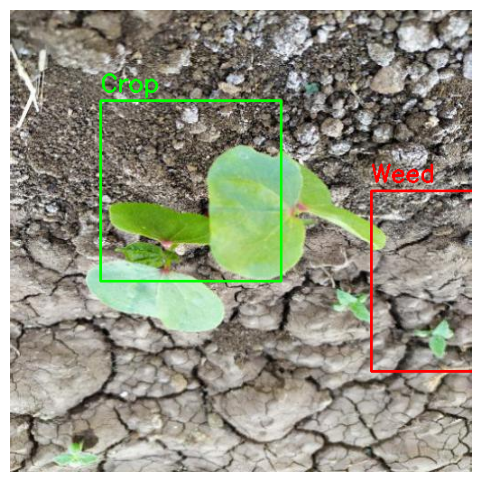

In [34]:
import cv2
import matplotlib.pyplot as plt

def draw_boundary(image, bbox, color, label):
    cv2.rectangle(image, bbox[0], bbox[1], color, 2)
    cv2.putText(image, label, (bbox[0][0], bbox[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

image_path = 'C:/Users/PURUSHOTHAM/Downloads/crop-and-weed-detection-data-with-bounding-boxes/agri_data/data/agri_0_1619.jpeg'

image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image '{image_path}' not found or cannot be loaded.")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

crop_bbox = [(100, 100), (300, 300)]
weed_bbox = [(400, 200), (600, 400)]

draw_boundary(image_rgb, crop_bbox, (0, 255, 0), 'Crop')
draw_boundary(image_rgb, weed_bbox, (255, 0, 0), 'Weed')

plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


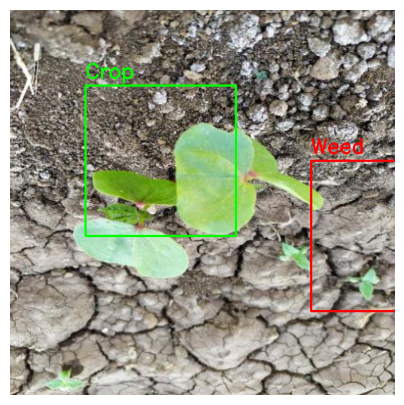

To eradicate the weed, you can consider using the following pesticides:
Pesticide A
Pesticide B
Pesticide C


In [35]:
import cv2
import matplotlib.pyplot as plt

def draw_boundary(image, bbox, color, label):
    cv2.rectangle(image, bbox[0], bbox[1], color, 2)
    cv2.putText(image, label, (bbox[0][0], bbox[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

image_path = 'C:/Users/PURUSHOTHAM/Downloads/crop-and-weed-detection-data-with-bounding-boxes/agri_data/data/agri_0_1619.jpeg'

image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image '{image_path}' not found or cannot be loaded.")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

crop_bbox = [(100, 100), (300, 300)]
weed_bbox = [(400, 200), (600, 400)]

draw_boundary(image_rgb, crop_bbox, (0, 255, 0), 'Crop')
draw_boundary(image_rgb, weed_bbox, (255, 0, 0), 'Weed')

plt.figure(figsize=(5, 5))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

def suggest_pesticides(label):
    if label == 'Weed':
        return ['Pesticide A', 'Pesticide B', 'Pesticide C']
    else:
        return []

weed_pesticides = suggest_pesticides('Weed')

if len(weed_pesticides) > 0:
    print("To eradicate the weed, you can consider using the following pesticides:")
    for pesticide in weed_pesticides:
        print(pesticide)
else:
    print("No pesticides are suggested for the detected weed.")
